In [13]:
import csv
import openslide
from openslide import ImageSlide, open_slide
import os
import glob
import re
import pandas as pd
import cv2
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import random

In [2]:
train_path = "/home/ubuntu/working/data3/"
images = {}
labels = {}
img_names = [] 
labels_index=[1, 1, 2,2, 0]

labels_Map=["Normal", "EE", "Celiac"]
files = glob.glob(os.path.join(train_path, '*.svs'))
for fl in files:
    flbase = os.path.basename(fl)
    flbase_noext = os.path.splitext(flbase)[0]
    images[flbase_noext]=fl 

In [3]:
ee_image_path = images['130382-6718_001']
cd = images['C17-83_04']
op_img = open_slide(ee_image_path)
imgEE = op_img.read_region((2000,2000),0, (1000,1000))

op_img2 = open_slide(cd)
imgCD = op_img2.read_region((5000,5000),0, (1000,1000))



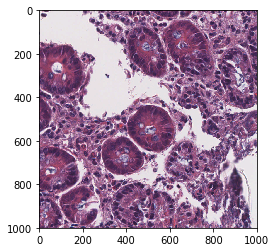

In [4]:
plt.imshow(imgEE,shape=(256,256))

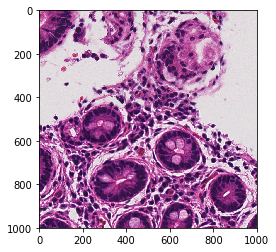

In [5]:
plt.imshow(imgCD,shape=(256,256))

In [95]:
# alpha = 1.1
# beta = 0
image = np.array(imgCD)
# new_image = np.zeros(image.shape, image.dtype)
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

std1 = image[:, :, 2].std()
image[:, :, 2]  =  image[:, :, 2] - 0.25*std1

std1 = image[:, :, 1].std()
image[:, :, 1]  =  image[:, :, 1] + 0.15*std1
std1 = image[:, :, 0].std()
image[:, :, 0]  =  image[:, :, 0] - 0.04*std1

out = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
# cv2.imshow('image',out)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

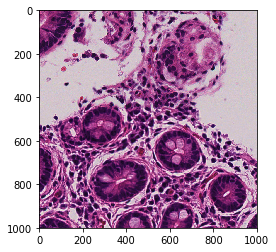

In [96]:
plt.imshow(out,shape=(256,256))
# image = np.array(imgEE)
# std1 = image[:, :, 1].std()
# std1

In [73]:
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
lab = cv2.cvtColor(out, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels
l2 = clahe.apply(l)  # apply CLAHE to the L-channel
lab = cv2.merge((l2,a,b))  # merge channels
img_arr2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

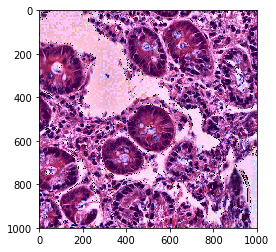

In [74]:
plt.imshow(img_arr2,shape=(256,256))

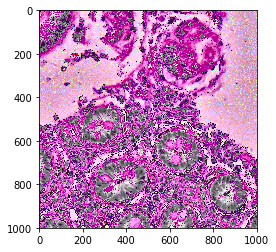

In [75]:
out3 = adjust_gamma(img_arr2,random.uniform(0.5, 2))

plt.imshow(out2,shape=(256,256))

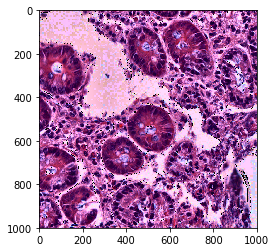

In [76]:
plt.imshow(out3,shape=(256,256))

In [6]:
# alpha = 1.1
# beta = 0
image = np.array(imgEE)
# new_image = np.zeros(image.shape, image.dtype)
# for y in range(image.shape[0]):
#     for x in range(image.shape[1]):
#         for c in range(image.shape[2]):
#             new_image[y,x,c] = np.clip(alpha*image[y,x,c] + beta, 0, 255)
            
image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

std1 = image[:, :, 2].std()
image[:, :, 2]  =  image[:, :, 2] + 0.25*std1

std1 = image[:, :, 1].std()
image[:, :, 1]  =  image[:, :, 1] + 0.75*std1
std1 = image[:, :, 0].std()
image[:, :, 0]  =  image[:, :, 0] + 0.04*std1

out = cv2.cvtColor(image, cv2.COLOR_HSV2BGR)
# cv2.imshow('image',out)
# k = cv2.waitKey(0)
# cv2.destroyAllWindows()

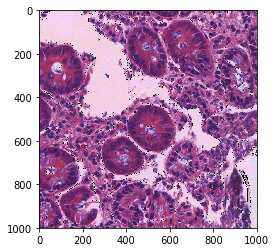

In [20]:
plt.imshow(out,shape=(256,256))

In [23]:
def adjust_gamma(image, gamma=1.0):
    invGamma = 1.0 / gamma
    table = np.array([((i / 255.0) ** invGamma) * 255
                      for i in np.arange(0, 256)]).astype("uint8")
    return cv2.LUT(image, table)

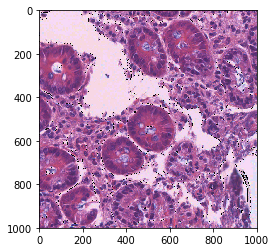

In [34]:
out2 = adjust_gamma(out,random.uniform(0.5, 2))

plt.imshow(out2,shape=(256,256))

In [39]:
clahe = cv2.createCLAHE(clipLimit=1.0, tileGridSize=(8,8))
lab = cv2.cvtColor(out, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels
l2 = clahe.apply(l)  # apply CLAHE to the L-channel
lab = cv2.merge((l2,a,b))  # merge channels
img_arr2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)

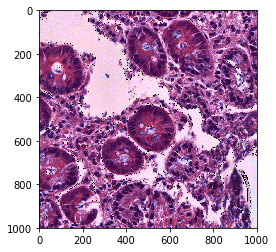

In [40]:
plt.imshow(img_arr2,shape=(256,256))

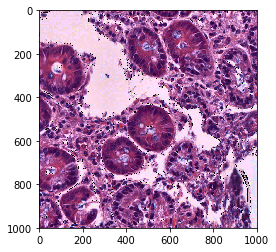

In [42]:
out2 = adjust_gamma(img_arr2,random.uniform(0.5, 2))

plt.imshow(out2,shape=(256,256))

In [11]:
img_ref = Image.fromarray(img_arr2, 'RGB')
arr = [img, img_ref]
arr[0]

NameError: name 'img' is not defined

In [ ]:
arr[1]

In [ ]:
cv2.imwrite('clahe_2.jpg',l2)